In [19]:
import pandas as pd

def plot(filename):
   

    episode_df = pd.read_csv("logdir/" + filename +".csv")

    print(episode_df.head())

    import matplotlib.pyplot as plt

    METRIC = "Reward"
    ROLLING_WINDOW = 20
    FROM = 0
    UNTIL = 200000
    BEST_RESULTS_NO_OBS_COST = 200
    ALWAYS_OBS = BEST_RESULTS_NO_OBS_COST - 0.4*200

    metrics_df_no_na = episode_df.dropna(how='any', subset=[METRIC, 'TotalSteps'])

    # Filter the DataFrame for TotalSteps > FROM and TotalSteps < UNTIL
    filtered_df = metrics_df_no_na[(metrics_df_no_na['TotalSteps'] > FROM) & (metrics_df_no_na['TotalSteps'] < UNTIL)]

    # Calculate the moving average using a window size of ROLLING_WINDOW
    filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

    # Plot the original data points and the smoothing line
    plt.plot(filtered_df['TotalSteps'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
    plt.plot(filtered_df['TotalSteps'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
    plt.axhline(y=BEST_RESULTS_NO_OBS_COST, color='g', linestyle='--', linewidth=1)
    plt.axhline(y=ALWAYS_OBS, color='b', linestyle='--', linewidth=1)

    plt.xlabel('Training Steps')
    plt.ylabel(METRIC)
    plt.title('Discounted returns')
    plt.legend(['Always OBS', 'Moving average', 'MAX'])
    plt.show()


   Episode     Reward  Length  TotalSteps
0        0  15.375045     200         201
1        1  -0.167138     200         401
2        2  21.039497     200         601
3        3  18.093858     200         801
4        4  16.439652     200        1001


/tmp/ipykernel_9197/731401517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


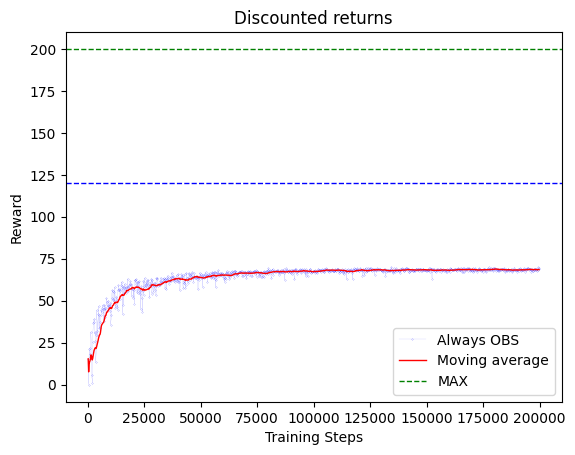

In [20]:
plot("MBRLCartpole-v0_200000__2023_06_19_09_17_zero_cost")

   Episode     Reward  Length  TotalSteps
0        0  20.868493     200         201
1        1  19.590583     200         401
2        2  17.751447     200         601
3        3  27.036443     200         801
4        4  39.575548     200        1001


/tmp/ipykernel_9197/731401517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


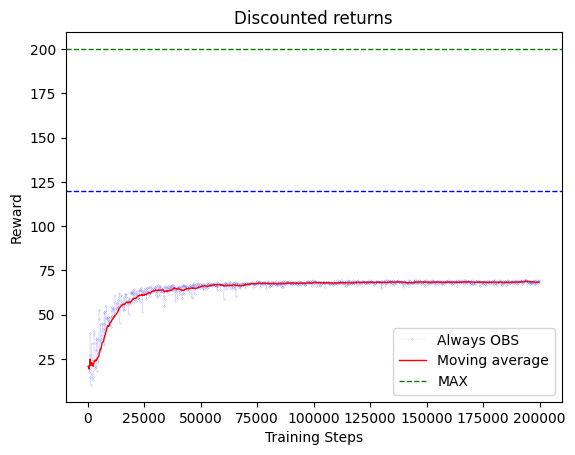

In [21]:
plot("MBRLCartpole-v0_200000__2023_06_19_09_41_vanilla")

   Episode     Reward  Length  TotalSteps
0        0  22.753625     200         201
1        1   3.343933     200         401
2        2  38.518392     200         601
3        3  21.097833     200         801
4        4  21.906642     200        1001


/tmp/ipykernel_9197/731401517.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


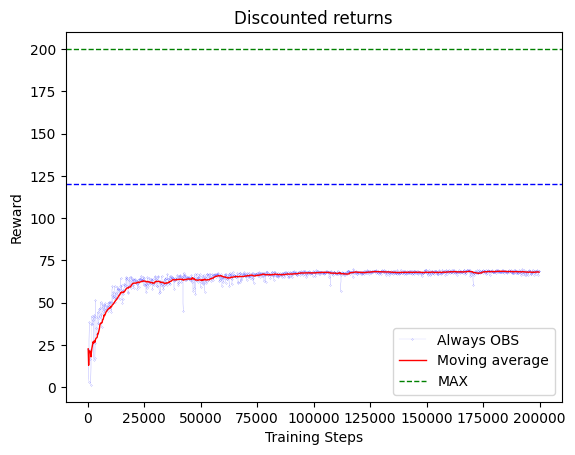

In [22]:
plot("MBRLCartpole-v0_1000000__2023_06_19_10_16_vanila")

In [3]:
episode_df

,Episode,Reward,Length,TotalSteps
0,0,4.144878,5,6
1,1,7.488135,8,14
2,2,3.773012,5,19
3,3,5.180652,6,25
4,4,2.555513,3,28
...,...,...,...,...
3227,3227,0.990163,1,200137
3228,3228,108.261782,131,200268
3229,3229,164.693095,200,200468
3230,3230,165.464952,200,200668


array([[ 6.12323400e-17, -1.00000000e+00],
       [ 6.34239197e-02, -9.97986676e-01],
       [ 1.26592454e-01, -9.91954813e-01],
       [ 1.89251244e-01, -9.81928697e-01],
       [ 2.51147987e-01, -9.67948701e-01],
       [ 3.12033446e-01, -9.50071118e-01],
       [ 3.71662456e-01, -9.28367933e-01],
       [ 4.29794912e-01, -9.02926538e-01],
       [ 4.86196736e-01, -8.73849377e-01],
       [ 5.40640817e-01, -8.41253533e-01],
       [ 5.92907929e-01, -8.05270258e-01],
       [ 6.42787610e-01, -7.66044443e-01],
       [ 6.90079011e-01, -7.23734038e-01],
       [ 7.34591709e-01, -6.78509412e-01],
       [ 7.76146464e-01, -6.30552667e-01],
       [ 8.14575952e-01, -5.80056910e-01],
       [ 8.49725430e-01, -5.27225468e-01],
       [ 8.81453363e-01, -4.72271075e-01],
       [ 9.09631995e-01, -4.15415013e-01],
       [ 9.34147860e-01, -3.56886222e-01],
       [ 9.54902241e-01, -2.96920375e-01],
       [ 9.71811568e-01, -2.35758936e-01],
       [ 9.84807753e-01, -1.73648178e-01],
       [ 9.

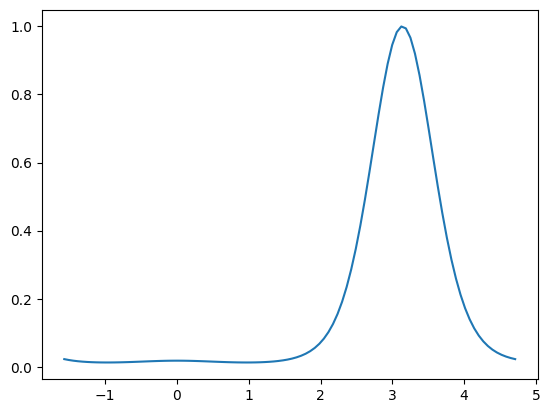

In [11]:
# plot this fucntion: 
import numpy as np

#x0 - CartpoleEnv.PENDULUM_LENGTH * np.sin(theta), -CartpoleEnv.PENDULUM_LENGTH * np.cos(theta)

theta = np.linspace(-np.pi/2, 3*np.pi/2, 100)
# 2d array of cos and sin of theta e,g, [[cos(theta1), sin(theta1)], [cos(theta2), sin(theta2)], ...]
coord = np.array([np.sin(theta), -0.6*np.cos(theta)]).T
# copy np.array([0.0, 0.6]) 100 times in another dimension
coord
y = [np.exp(-np.sum(np.square([sin, cos] - np.array([0.0, 0.6]))) / (0.6 ** 2)) for sin, cos in coord]
y

plt.plot(theta, y)

In [12]:
max(y)

0.9993009818932063

In [13]:
max(y)*200

199.86019637864126